## Neural Network Classification in TensorFlow

* Architecture of a neural network **classification** model
* Input shapes and output shapes of a **classification** model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
 * Creating a model, compiling a model, fiiting a model, evaluating a model
* Different **classification** evaluation methods
* Saving and loading models

👁️ Andre Karpathy - [A recipe for training Nueral Networks](https://karpathy.github.io/2019/04/25/recipe/)

### Creating Data to view and fit

We can do a small prerehearsal model before rehearsal

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)



In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let`s visualize data to better understand it

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0],'X1':X[:, 1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


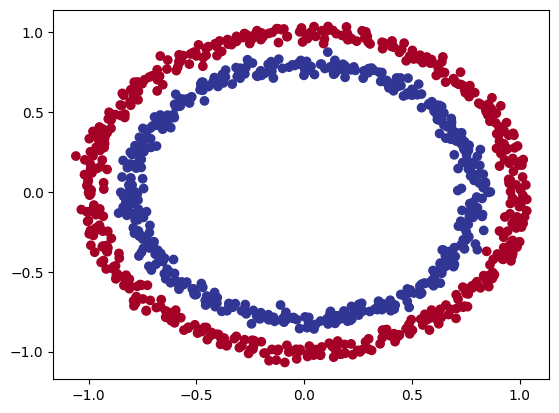

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


We want a model to predict the line between red and blue

👉 [playground.tensorflow.org](https://playground.tensorflow.org/)

### Input and Output Shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [8]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

In [9]:
# Import Tensorflow
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed (42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 1.2788 - accuracy: 0.4550
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7097 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5030


In [11]:
# Improve our model training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our mdel is getting around 50% accuracy... it's performing as if it's guessing

So let's add one more layer and keep training for longer...

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932446360588074, 0.5]

### Improving our model

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.693991482257843, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unnique class falls)

In [14]:
import numpy as np

In [15]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
doing multiclass classification


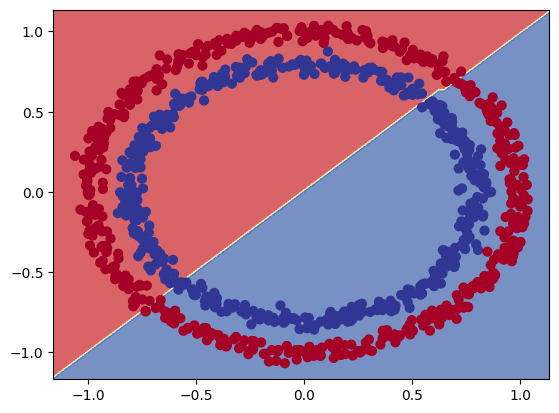

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [17]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]




In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with three layers
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 432.9468 - mae: 432.9468
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 340.5730 - mae: 340.5730
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 251.5070 - mae: 251.5070
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 158.4482 - mae: 158.4482
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 65.2037 - mae: 65.2037
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 67.0698 - mae: 67.0698
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 78.3202 - mae: 78.3202
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 56.6647 - mae: 56.6647
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 44.6618 - mae: 44.6618
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 50.4445 - mae: 50.4445
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


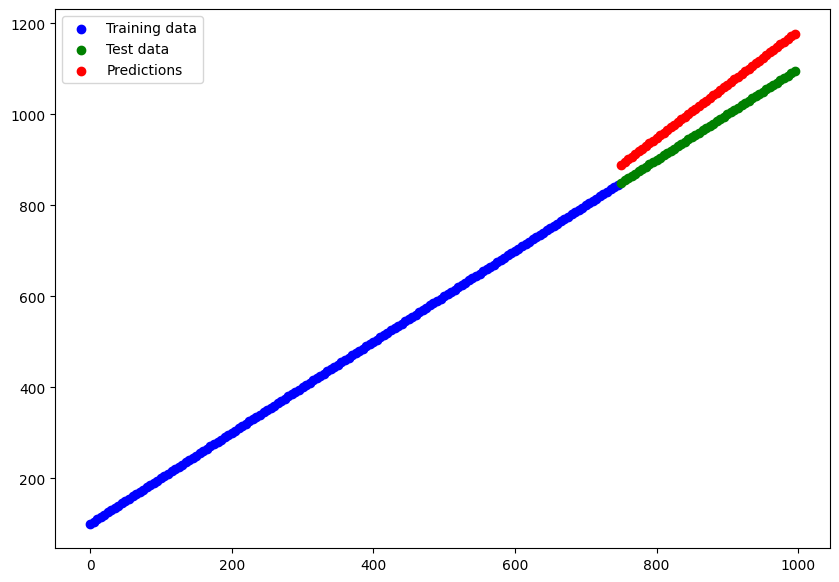

In [19]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### The missing piece: Non-Linearity

🤔 What could you draw if you had an unlimited amount of straight (linear) and non-straight (non-linear) lines?

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2 Compile our model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3 Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2206 - accuracy: 0.4975
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1466 - accuracy: 0.4975
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0739 - accuracy: 0.4963
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0409 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0131 - accuracy: 0.4987
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8933 - accuracy: 0.5002
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7993 - accuracy: 0.4987
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6547 - accuracy: 0.4999
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4738 - accuracy: 0.4979
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2430 - accuracy: 0.4988
Epoch 11/

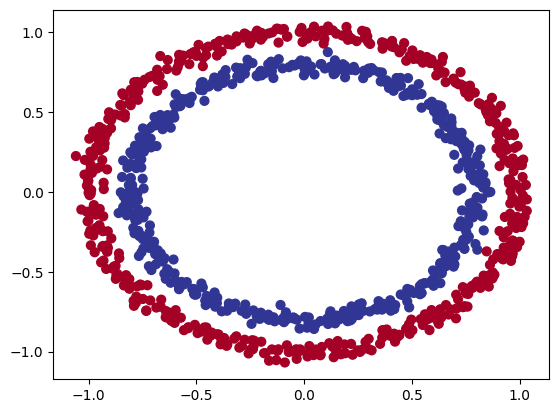

In [21]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


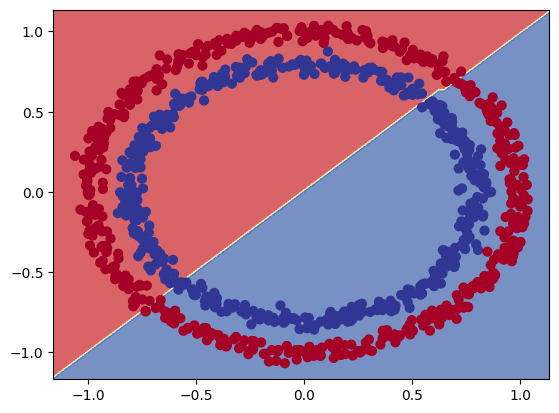

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let`s try build our first model without linear activation. Starting with ReLU

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history_2 = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.5040
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5050
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5100
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5090
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5110
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5110
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5200
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5310
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5870
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6000
Epoch 11/

In [24]:
# Evaluate model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9950


[0.04076182842254639, 0.9950000047683716]

313/313 [==============================] - 1s 3ms/step
doing binary classification


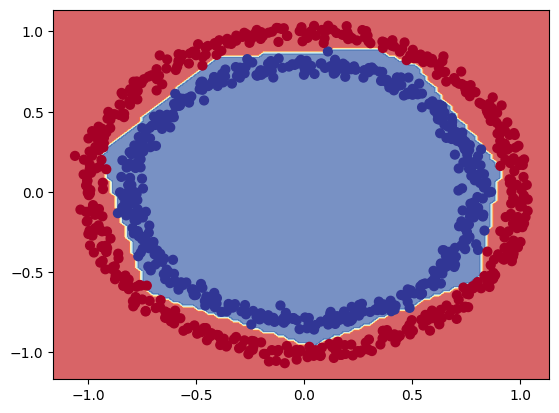

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_6, X, y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: whata data did the model learn on and what data did we predict on?

👁️ **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Time to see in action non-linear functions

In [26]:
# Create a toy tensor (similar to the data que pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

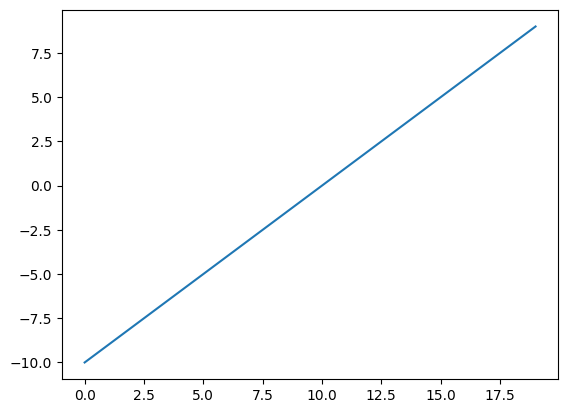

In [27]:
# Visualize our toy tensor
plt.plot(A)

In [28]:
# Let's start by replicating a sigmoid function: sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

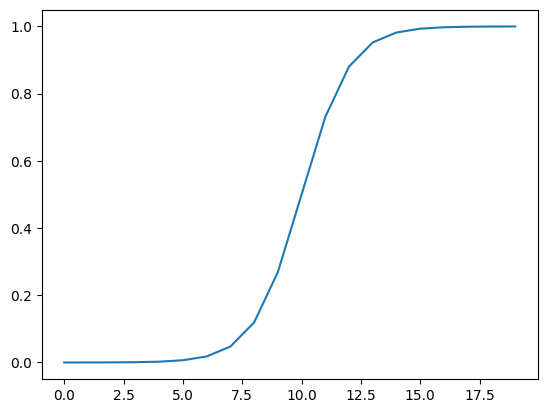

In [29]:
#Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [30]:
# Recreate the ReLU function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

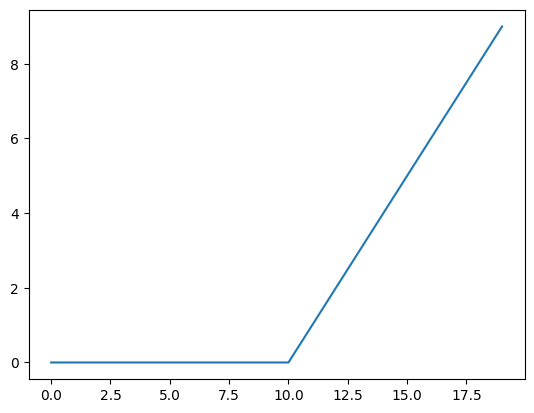

In [31]:
# Plot RELU_modified tensor
plt.plot(relu(A));

In [32]:
# Try the linear activation
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### Evaluating and improving our classification

We need to create a training and a test set

In [33]:
# Check how many examples
len(X)

1000

In [34]:
# Split into train and test set indexing
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [35]:
# Let's recrette a model to fit on the training data
# and evaluate in the test model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 2. Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=75)

Epoch 1/75
25/25 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.4950
Epoch 2/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5300
Epoch 3/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5263
Epoch 4/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5425
Epoch 5/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5362
Epoch 6/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5512
Epoch 7/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.5562
Epoch 8/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.5838
Epoch 9/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.6050
Epoch 10/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6062
Epoch 11/75
25/25 [

In [36]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9950


[0.03046802245080471, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


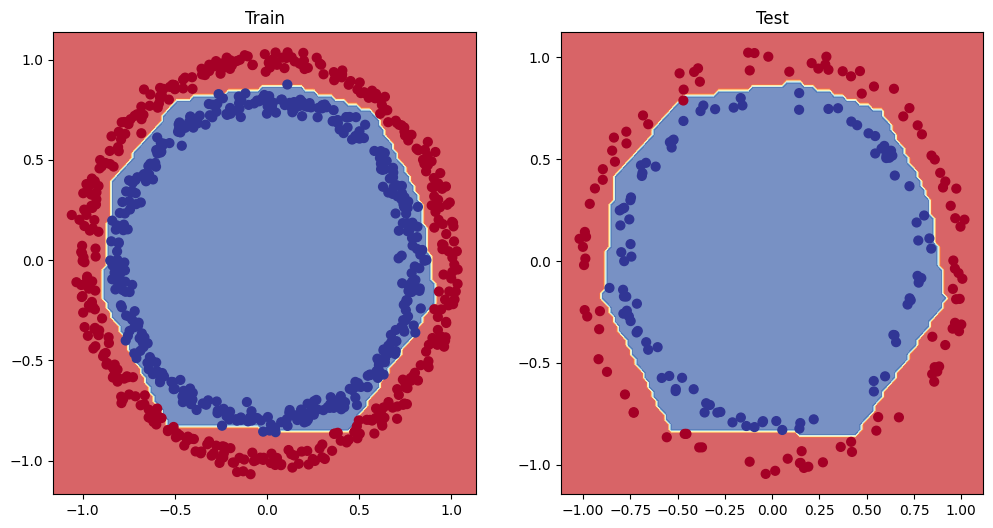

In [37]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)

In [38]:
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Plot the loss (or training curves)

In [39]:
# convert history_8 into a dataframe
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.690963,0.49500
1,0.686807,0.53000
2,0.683565,0.52625
3,0.680375,0.54250
4,0.676119,0.53625
...,...,...
70,0.042206,0.99000
71,0.043102,0.98750
72,0.041071,0.99000
73,0.038806,0.99375


Text(0.5, 1.0, 'Model_8 loss curves')

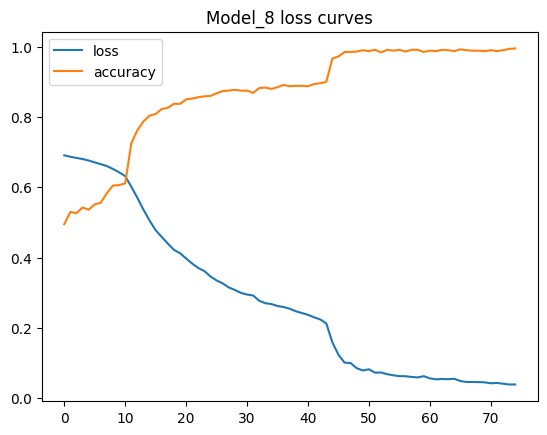

In [40]:
# Plot the loss curves
pd.DataFrame(history_8.history).plot()
plt.title('Model_8 loss curves')

👁️ **Note:** For many problems, the loss function going down means the model is improving ( the predictions it's making are getting closer to the ground truth labels.)

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model
* A modified loss curves plot.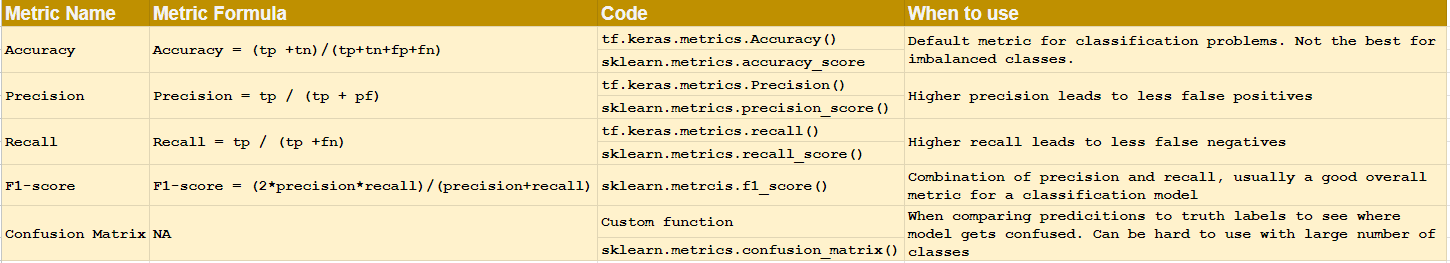

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 5s 13ms/step - loss: 0.6966 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6963 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6954 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.6948 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.6945 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 14ms/step - l

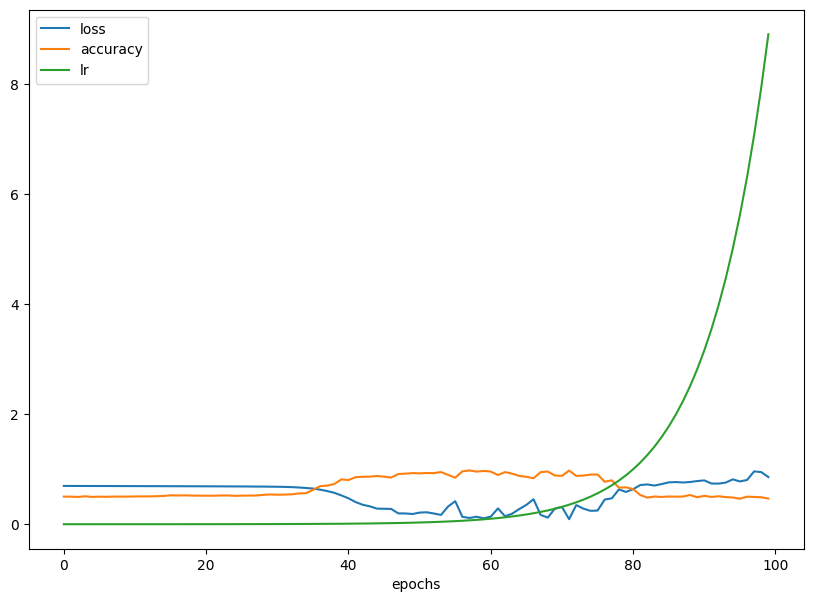

In [44]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs');


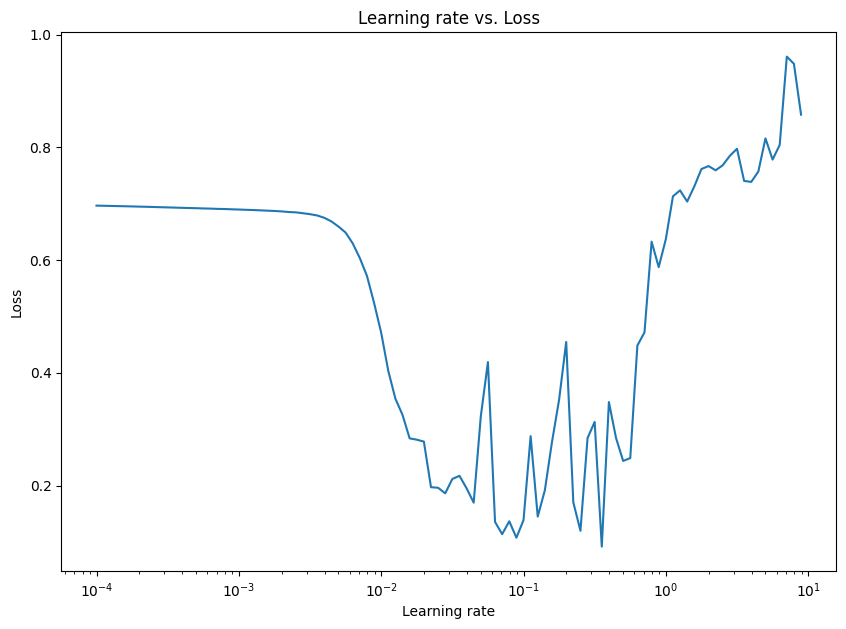

In [45]:
# plot the learning rate versus the loss
lrs = 1e-4 *(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

In [46]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [47]:
10**-1.5

0.03162277660168379

Let's create another model with a more "accurate" learning rate

In [48]:
# Set randmom seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit the model for 20 epochs (or more)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.4800
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5188
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5487
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5863
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.6575
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7588
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7900
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8325
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4255 - accuracy: 0.8637
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8712
Epoch 11/20
25/25 [

In [49]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9950


[0.0703698992729187, 0.9950000047683716]

In [50]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9950


[0.03046802245080471, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


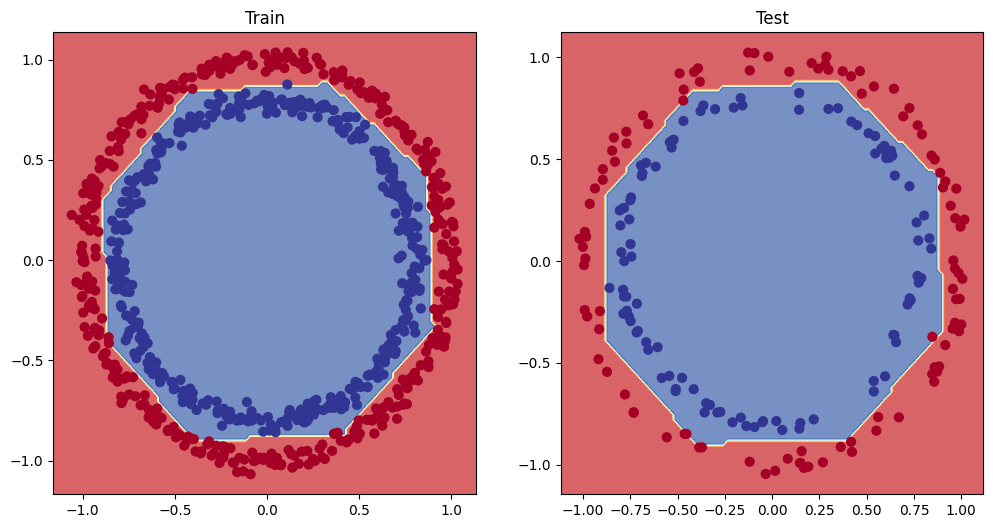

In [51]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test);

### Clasification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you shoulkd be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikitlearn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [52]:
# Check the accuracy of outr model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy*100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9950
Model loss on the test set: 0.0703698992729187
Model accuracy on the test set: 99.50%


### How about a confusion matrix

In [54]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 7ms/step


ValueError: ignored

Oops... looks like our predictionas array has come in **prediction probability** form... the standard output from the sigmoid(or softmax)

In [55]:
y_preds[:10]

array([[0.9599809 ],
       [0.9599809 ],
       [0.9599809 ],
       [0.9599809 ],
       [0.1029752 ],
       [0.02180178],
       [0.939153  ],
       [0.04361589],
       [0.9599809 ],
       [0.23266336]], dtype=float32)

In [56]:
9.9167573e-01

0.99167573

In [57]:
# Convert our predictions probabiliities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [58]:
# Create matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

Prettify Confusion Matrix

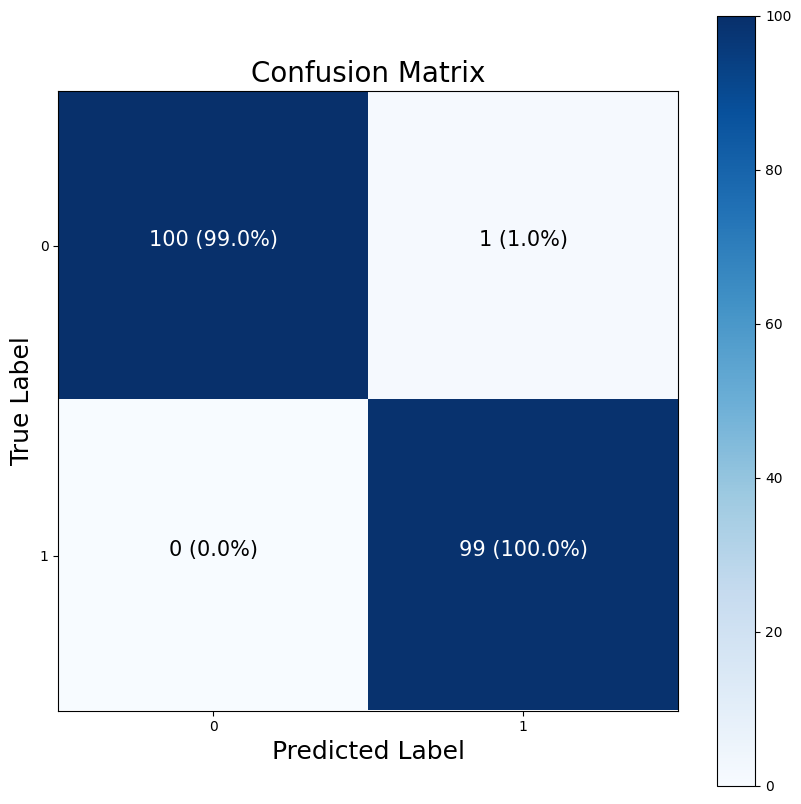

In [59]:
# Note : the confusion matrix code is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let`s prettify
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set axis position in the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else "black",
           size=15)

In [60]:
(95/426)*100

22.300469483568076

## Work with a larger dataset (Multiclass Classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification
* It also means the same even if you have 100 different classes

To practivce, we are building a neural network to classify different items of clothing.



### Get familiar with data

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# This data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [62]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [63]:
# Check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

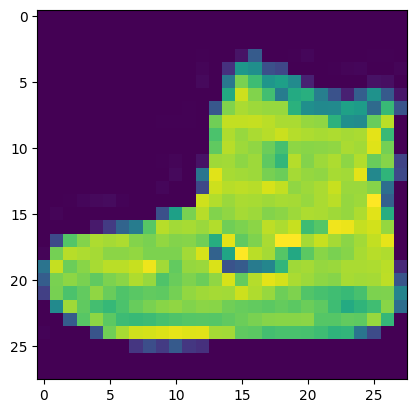

In [64]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [65]:
# cCreate a samll list with the names of the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

len(class_names)

10

Text(0.5, 1.0, 'Bag')

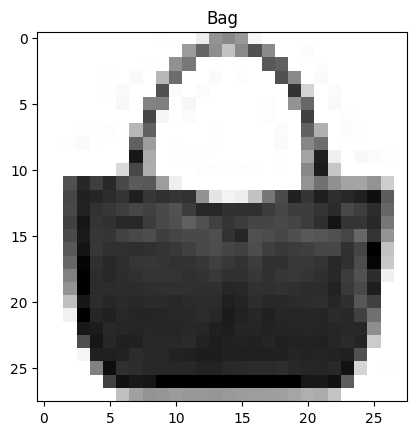

In [66]:
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

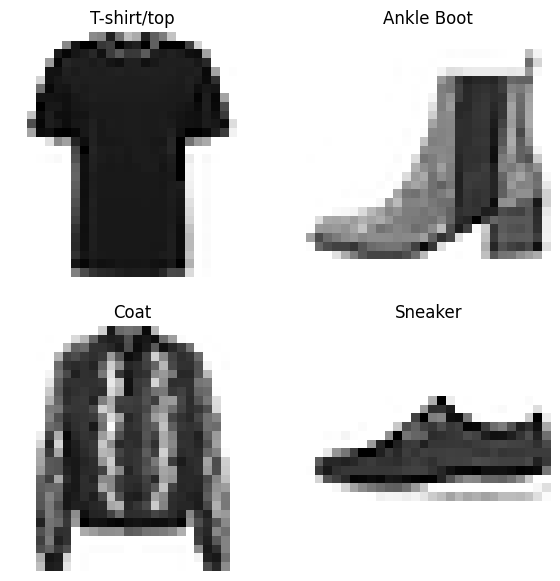

In [67]:
# Plot multiple random images from fashionMnist
import random
plt.figure(figsize=(7, 7))
for i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  ax.axis('off')

### Building a multi-class classification model

In [73]:
# Build a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_f01 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_f01.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history_f01 = model_f01.fit(train_data,
                                  train_labels,
                                  epochs=10,
                                  validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7105 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3030 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [69]:
# Summary
model_f01.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Check the min and max of our data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer normilized data

In [71]:
# Normalize (dividing by the maximum)
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check max and min
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [72]:
# Build a model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_f02 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_f02.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history_f02 = model_f02.fit(train_data_norm,
                                  tf.one_hot(train_labels, depth=10),
                                  epochs=10,
                                  validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1600 - accuracy: 0.5400 - val_loss: 0.7871 - val_accuracy: 0.7217
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7225 - accuracy: 0.7380 - val_loss: 0.7181 - val_accuracy: 0.7410
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6611 - accuracy: 0.7628 - val_loss: 0.6665 - val_accuracy: 0.7712
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6293 - accuracy: 0.7761 - val_loss: 0.6510 - val_accuracy: 0.7711
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6097 - accuracy: 0.7819 - val_loss: 0.6227 - val_accuracy: 0.7765
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5955 - accuracy: 0.7891 - val_loss: 0.6400 - val_accuracy: 0.7771
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5857 - accuracy: 0.7930 - val_loss: 0.6179 - val_accuracy:

👁️ Neural Networks prefer data as normalized/scaled form

<Axes: title={'center': 'Normalized data'}>

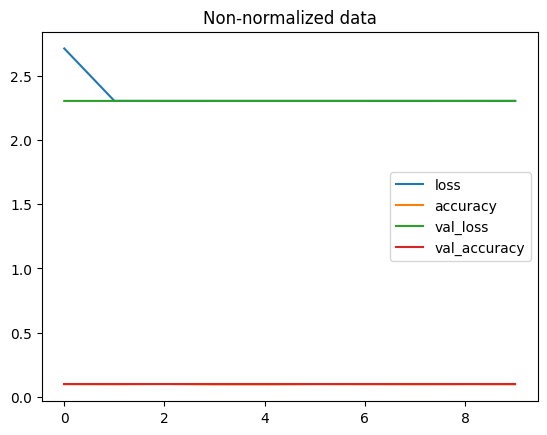

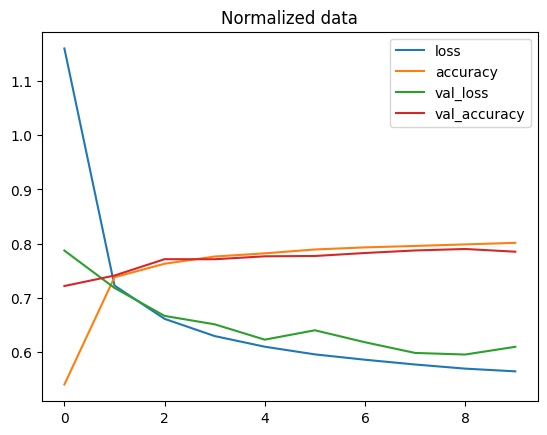

In [75]:
import pandas as pd
#Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history_f01.history).plot(title='Non-normalized data')
# Plot normalized data
pd.DataFrame(norm_history_f02.history).plot(title='Normalized data')

👁️ **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)